In [35]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft
from matplotlib import rc
from matplotlib.pyplot import cm
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
from scipy import signal
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from random import randint
from scipy.signal import find_peaks

In [37]:
def FreqSplit(spectrum,llim,rlim):
    window = np.zeros((spectrum.shape[-1]))
    window[llim:rlim] = 1.0
    
    signal = np.fft.ifftshift(spectrum*window)
    signal = np.fft.ifft(signal)
    return np.sqrt((signal.real)**2 + (signal.imag)**2)

In [38]:
def Signal(folder):
    path = "./" + str(folder) + "/"
    t = np.genfromtxt(path + "datat.txt")
    Mx = np.genfromtxt(path + "dataMx.txt")
    My = np.genfromtxt(path + "dataMy.txt")
    Mz = np.genfromtxt(path + "dataMz.txt")
    return t, Mx, My, Mz, np.sqrt(Mx**2 + My**2)

In [39]:
def Signal_1(folder):
    path = "./" + str(folder) + "/"
    Mx = np.genfromtxt(path + "dataMx.txt")
    My = np.genfromtxt(path + "dataMy.txt")
    Mz = np.genfromtxt(path + "dataMz.txt")
    return np.sqrt(Mx**2 + My**2)

In [40]:
def Spectrum(t,Mx,My):
    M = Mx + 1j * My
    if True:
        M = M[150000:300000]
    dt = t[1] - t[0]
    fs = 1.0/dt
    freq = np.linspace(-fs/2,fs/2,M.shape[-1])
    spec = np.fft.fft(M)
    spec = np.fft.fftshift(spec)
    if True:
        spec = np.absolute(spec)
    return freq, spec

In [58]:
if False:
    V = 14
    for i in range(V):
        locals()["t"+str(i+1)],locals()["Mx"+str(i+1)],locals()["My"+str(i+1)],locals()["Mz"+str(i+1)],locals()["Mabs"+str(i+1)] = Signal(i+1)

    for i in range(V):
        locals()["freq"+str(i+1)], locals()["spec"+str(i+1)] = Spectrum(locals()["t"+str(i+1)],locals()["Mx"+str(i+1)],locals()["My"+str(i+1)])
else:
    D = np.asarray([201,203,1400]) 
    #D = np.linspace(200,211,12, endpoint=True,dtype=np.int64)
    print("D = ", D)
    for i in D:
        locals()["t"+str(i)],locals()["Mx"+str(i)],locals()["My"+str(i)],locals()["Mz"+str(i)],locals()["Mabs"+str(i)] = Signal(i)

    for i in D:
        locals()["freq"+str(i)], locals()["spec"+str(i)] = Spectrum(locals()["t"+str(i)],locals()["Mx"+str(i)],locals()["My"+str(i)])    

        

D =  [ 201  203 1400]


In [42]:
#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']

In [43]:
colors = []

for i in range(D.shape[-1]):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

In [44]:
colorsHex = ['#8c0304', '#04039a', '#fe0600', '#fe9a00']
# https://www.w3schools.com/colors/colors_hexadecimal.asp

<IPython.core.display.Javascript object>


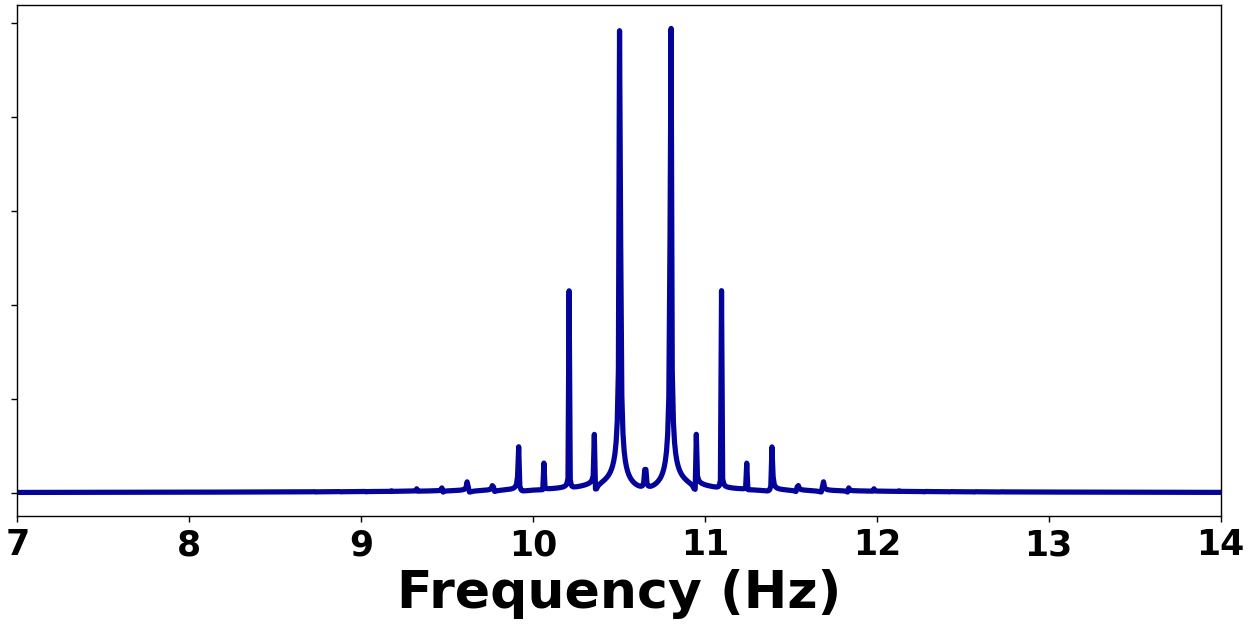

In [64]:
rc('font', weight='bold')
fig = plt.figure(constrained_layout=True, figsize=(10,5))
spec = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(spec[0, 0])

D3 = [1400]
for i,j in zip(D3,colors):
    ax1.plot(locals()["freq"+str(i)], locals()["spec"+str(i)],linewidth=3.0,label = str(i),color=colorsHex[1])
    #ax1.plot(locals()["t"+str(i)], locals()["Mx"+str(i)],linewidth=3.0,label = str(i))# ,color='red'

ax1.set_xlabel(r'Frequency (Hz)', fontsize=30, color='black',fontweight='bold', loc='center')
#ax1.set_ylabel(r'Spectrum', fontsize=30, color='black',fontweight='bold')
#ax1.legend(fontsize=10,frameon=False)
ax1.tick_params(axis='both',labelsize=20)
#ax1.grid(True, linestyle='-.')
ax1.ticklabel_format(axis='y',style='sci',scilimits=(2,2),useMathText=True)
#ax1.set_ylim(-1,1)
ax1.set_xlim(7,14)
#ax1.text(1.0, 200000, '(1a)', ha='center', fontsize=25, color='black',fontweight='bold')
ax1.set_yticklabels([])
#ax1.set_xticklabels([])

#plt.savefig('fig_rdcu_180_3.png',transparent=True)
plt.savefig('spectrum'+str(D3[-1])+'.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


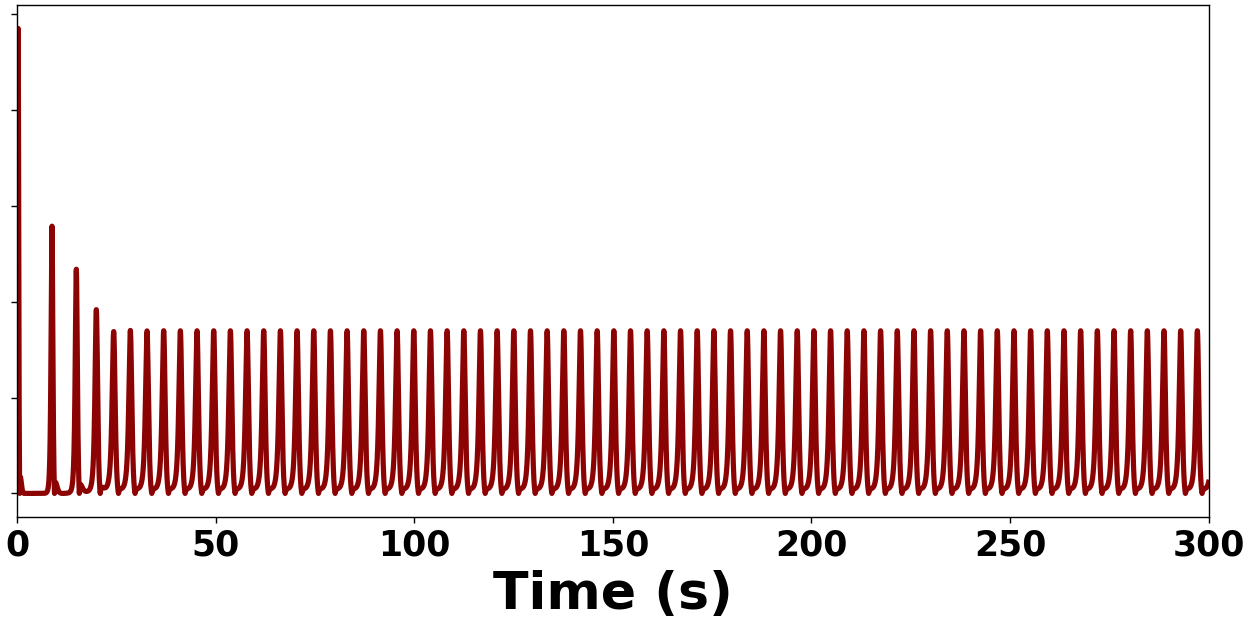

In [61]:
rc('font', weight='bold')
fig = plt.figure(constrained_layout=True, figsize=(10,5))
spec = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(spec[0, 0])

D3 = [203]
for i,j in zip(D3,colors):
    ax1.plot(locals()["t"+str(i)], locals()["Mabs"+str(i)],linewidth=3.0,label = str(i),color = colorsHex[0])# ,color='red'

ax1.set_xlabel(r'Time (s)', fontsize=30, color='black',fontweight='bold', loc='center')
#ax1.set_ylabel(r'Signal', fontsize=30, color='black',fontweight='bold')
#ax1.legend(fontsize=10,frameon=False)
ax1.tick_params(axis='both',labelsize=20)
#ax1.grid(True, linestyle='-.')
ax1.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True)
#ax1.set_ylim(-1,1)
ax1.set_xlim(0,300)
#ax1.text(1.0, 200000, '(1a)', ha='center', fontsize=25, color='black',fontweight='bold')
ax1.set_yticklabels([])
#ax1.set_xticklabels([])

#plt.savefig('fig_rdcu_180_3.png',transparent=True)
plt.savefig('signal'+str(D3[-1])+'.pdf',bbox_inches='tight')